__Project Overview__

__Analyse various school outcomes in Tennessee using pandas. Suppose you are a public school administrator. Some schools in your 
state of Tennessee are performing below average academically. Your superintendent, under pressure from frustrated parents and voters, approached you with the task of understanding why these schools are under-performing. To improve school performance, you need to learn more about these schools and their students, just as a business needs to understand its own strengths and weaknesses and its customers. Though you is eager to build an impressive explanatory model, you know the importance of conducting preliminary research to prevent possible pitfalls or blind spots. Thus, you engages in a thorough exploratory analysis, which includes: a lit review, data collection, descriptive and inferential statistics, and data visualization.__

__Phase 1 - Data Collection__

Here is a data of every public school in middle Tennessee. The data also includes various demographic, school faculty, and income variables. You need to convert the data into useful information.



In [4]:
# import all the liabraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [7]:
# load the data

os.chdir('C:\\Users\\Ibrahim\\Desktop\\Top Mentor\\Batch 52- Day9\\CS 15 Data Transformation-1')

df=pd.read_csv('middle_tn_schools.csv')

In [9]:
df

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5,851,10,90.2,95.8,15.7,Public,89.4,85.2,54,2.9,85.5,1.6,5.6
1,Anderson Elementary,2,412,71,32.8,37.3,12.8,Public,43.0,38.3,32,3.9,86.7,1.0,4.9
2,Avoca Elementary,4,482,43,78.4,83.6,16.6,Public,75.7,73.0,29,1.0,91.5,1.2,4.4
3,Bailey Middle,0,394,91,1.6,1.0,13.1,Public Magnet,2.1,4.4,30,80.7,11.7,2.3,4.3
4,Barfield Elementary,4,948,26,85.3,89.2,14.8,Public,81.3,79.6,64,11.8,71.2,7.1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,Winfree Bryant Middle School,3,611,57,59.1,65.2,16.9,Public,61.4,57.7,36,15.2,66.3,1.5,15.7
343,Winstead Elementary School,5,515,8,93.9,97.0,14.3,Public,92.0,89.3,36,3.3,87.4,3.1,4.1
344,Woodland Elementary,4,424,55,84.8,76.7,14.1,Public,69.4,79.4,30,11.6,70.5,2.1,9.7
345,Woodland Middle School,5,866,2,93.3,97.1,19.2,Public,89.8,84.9,45,4.5,77.6,10.0,4.4


In [10]:
df.describe()

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
count,347.000000,347.000000,347.000000,347.000000,341.000000,347.000000,341.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,2.968300,699.472622,50.279539,58.801729,58.249267,15.461671,57.004692,57.049856,44.939481,21.197983,61.673487,2.642651,11.164553
std,1.690377,400.598636,25.480236,32.540747,32.702630,5.725170,26.696450,27.968974,22.053386,23.562538,27.274859,3.109629,12.030608
min,0.000000,53.000000,2.000000,0.200000,0.600000,4.700000,1.500000,0.100000,2.000000,0.000000,1.100000,0.000000,0.000000
25%,2.000000,420.500000,30.000000,30.950000,27.100000,13.700000,37.600000,37.000000,30.000000,3.600000,40.600000,0.750000,3.800000
50%,3.000000,595.000000,51.000000,66.400000,65.800000,15.000000,61.800000,60.700000,40.000000,13.500000,68.700000,1.600000,6.400000
75%,4.000000,851.000000,71.500000,88.000000,88.600000,16.700000,79.600000,80.250000,54.000000,28.350000,85.950000,3.100000,13.800000
max,5.000000,2314.000000,98.000000,99.800000,99.800000,111.000000,99.000000,98.900000,140.000000,97.400000,99.700000,21.100000,65.200000


__Phase 2 - Group data by school ratings__


Chooses indicators that describe the student body (for example, reduced_lunch) or school administration (stu_teach_ratio) hoping they will explain school_rating. reduced_lunch is a variable measuring the average percentage of students per school enrolled in a federal program that provides lunches for students from lower-income households. In short, reduced_lunch is a good proxy for household income.Isolates ‘reduced_lunch’ and groups the data by ‘school_rating’ using pandas groupby method and then uses describe on the re-shaped data


In [12]:
isolate=df[['reduced_lunch','school_rating']]

In [13]:
isolate.groupby('school_rating').describe().unstack()

                      school_rating
reduced_lunch  count  0                43.000000
                      1                40.000000
                      2                44.000000
                      3                56.000000
                      4                86.000000
                      5                78.000000
               mean   0                83.581395
                      1                74.950000
                      2                64.272727
                      3                50.285714
                      4                41.000000
                      5                21.602564
               std    0                 8.813498
                      1                11.644191
                      2                11.956051
                      3                13.550866
                      4                16.681092
                      5                17.651268
               min    0                53.000000
                      1          

In [14]:
isolate.groupby('school_rating').describe()

reduced_lunch                                                  \
                      count       mean        std   min    25%   50%    75%   
school_rating                                                                 
0                      43.0  83.581395   8.813498  53.0  79.50  86.0  90.00   
1                      40.0  74.950000  11.644191  53.0  65.00  74.5  84.25   
2                      44.0  64.272727  11.956051  37.0  54.75  62.5  74.00   
3                      56.0  50.285714  13.550866  24.0  41.00  48.5  63.00   
4                      86.0  41.000000  16.681092   4.0  30.00  41.5  50.00   
5                      78.0  21.602564  17.651268   2.0   8.00  19.0  29.75   

                     
                max  
school_rating        
0              98.0  
1              98.0  
2              88.0  
3              78.0  
4              87.0  
5              87.0

__Phase 3 – Correlation analysis__

Find the correlation between ‘reduced_lunch’ and ‘school_rating’. The values in the correlation matrix table will be between -1 and 1. A value of -1 indicates the strongest possible negative correlation, meaning as one variable decreases the other increases. And a value of 1 indicates the opposite.


In [15]:
isolate.corr()

,reduced_lunch,school_rating
reduced_lunch,1.000000,-0.815757
school_rating,-0.815757,1.000000


__Phase 4 – Scatter Plot (Find the relationship between School rating and Reduced Lunch)__

Find the relationship between school_rating and reduced_lunch, Plot a graph with the two variables on a scatter plot. Each dot represents a school. The placement of the dot represents that school's rating (Y-axis) and the percentage of its students on reduced lunch (x-axis). The downward trend line shows the negative correlation between school_rating and reduced_lunch (as one increases, the other decreases). 

The slope of the trend line indicates how much school_rating decreases as reduced_lunch increases. A steeper slope would indicate that a small change in reduced_lunch has a big impact on school_rating while a more horizontal slope would indicate that the same small change in reduced_lunch has a smaller impact on school_rating.


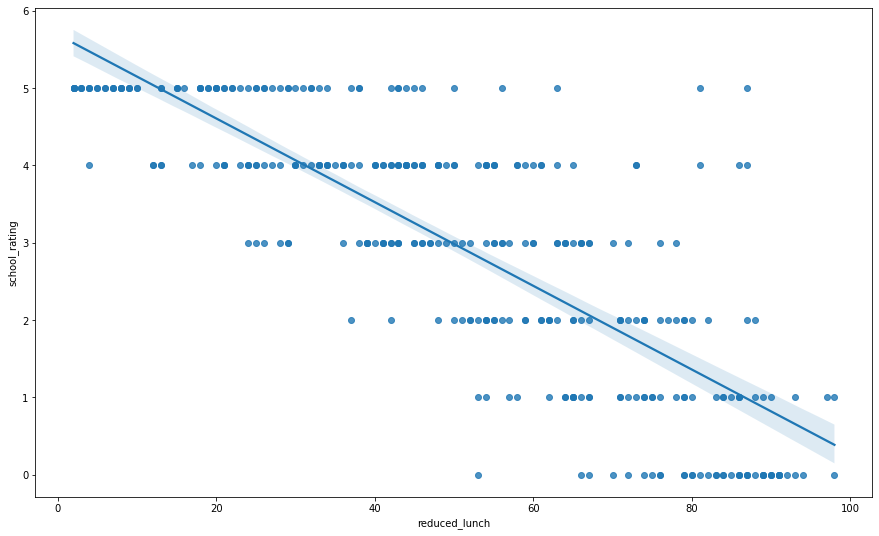

In [16]:
plt.figure(figsize=(15,9))
sns.regplot(data=df,x='reduced_lunch',y='school_rating')
plt.show()




__Phase 5 – Correlation Matrix (An efficient graph for assessing relationshipe is the correlation matrics)__


An efficient graph for assessing relationships is the correlation matrix, as seen below; its color-coded cells make it easier to interpret than the tabular correlation matrix above. Red cells indicate positive correlation; blue cells indicate negative correlation; white cells indicate no correlation. The darker the colors, the stronger the correlation (positive or negative) between those two variables. Draw a graph of correlation matrix having all important fields of data frame.


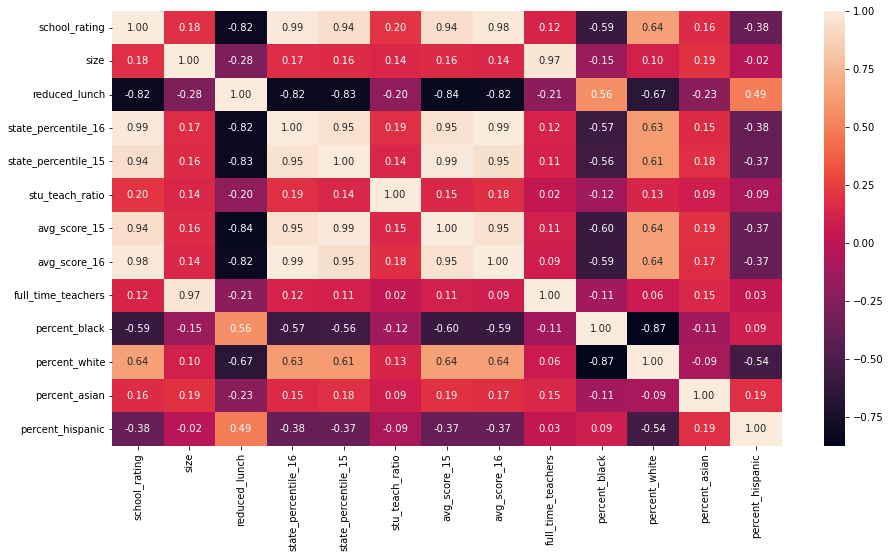

In [18]:

plt.figure(figsize=(15,8))
df_corr=df.corr()
sns.heatmap(df_corr,xticklabels=df_corr.columns.values,yticklabels=df_corr.columns.values,annot=True,fmt='.2f')
plt.show()
